In [1]:
from tqdm import tqdm
from konlpy.tag import Mecab
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
tokenizer = Mecab(dicpath="C:/mecab/mecab-ko-dic")
docs = []
tokens = []
size = 500

with open('nsmc/ratings_train.txt', 'r', encoding='UTF8') as f:
    for ff in f:
        docs.append(ff.split('\t')[1])
for _, line in tqdm(enumerate(docs), total=len(docs)):
    token = tokenizer.nouns(line)
    if token:
        token_arr = [s for s in token if len(s) > 1]
        tokens.append(token_arr)
# with open('nsmc/nouns.txt', 'a', encoding='UTF8') as f:
#     for t in tokens:
#         if t != '\n' and t != '':
#             f.writelines(' '.join(t) + '\n')

100%|██████████| 150001/150001 [00:07<00:00, 20996.21it/s]


In [7]:
model = Word2Vec(tokens, vector_size=100, window=3, min_count=1, workers=4, sorted_vocab=True)
ex_vector = model.wv['내용']
ex_vector

array([-0.60349286,  0.04500804,  0.2938882 ,  0.11336755, -0.1590433 ,
       -1.7722269 ,  1.0298543 ,  1.4536265 , -0.5928903 , -0.9964121 ,
       -0.20866051, -1.3376139 , -0.71419805,  0.09607302, -0.308976  ,
       -0.17049834,  0.631106  , -0.4499065 , -0.05194015, -1.7234312 ,
        0.16517653,  0.2728007 ,  0.50093883, -0.01634023, -0.28849265,
        0.322442  , -0.7819825 ,  0.02457872, -0.31194335, -0.04402068,
        0.6377574 ,  0.44831553,  0.65240467,  0.08843698, -0.66007024,
        0.6694057 ,  0.6134312 , -0.54802585, -0.68977535, -1.2984697 ,
        0.09894031,  0.06610066, -1.2361702 , -0.03675017,  0.27058148,
       -0.93085486,  0.09355967, -0.02538087,  0.81976676,  0.3288202 ,
       -0.02670347, -0.47814324,  0.37052897,  0.31363276,  0.03280353,
        0.18813507,  0.1916586 , -0.32059684, -0.0069903 ,  0.54103506,
       -0.46457353, -0.04413921,  0.35310414, -0.33559194, -1.5502903 ,
        0.25571582, -0.4487818 ,  0.65001386, -0.6180177 ,  0.70

In [8]:
vocab = list(model.wv.index_to_key)
vectors = model.wv[vocab][:size, :]
vocab_str = vocab[:size]


pca = PCA(n_components=2)
pca.fit(vectors)
x_pca = pca.transform(vectors)

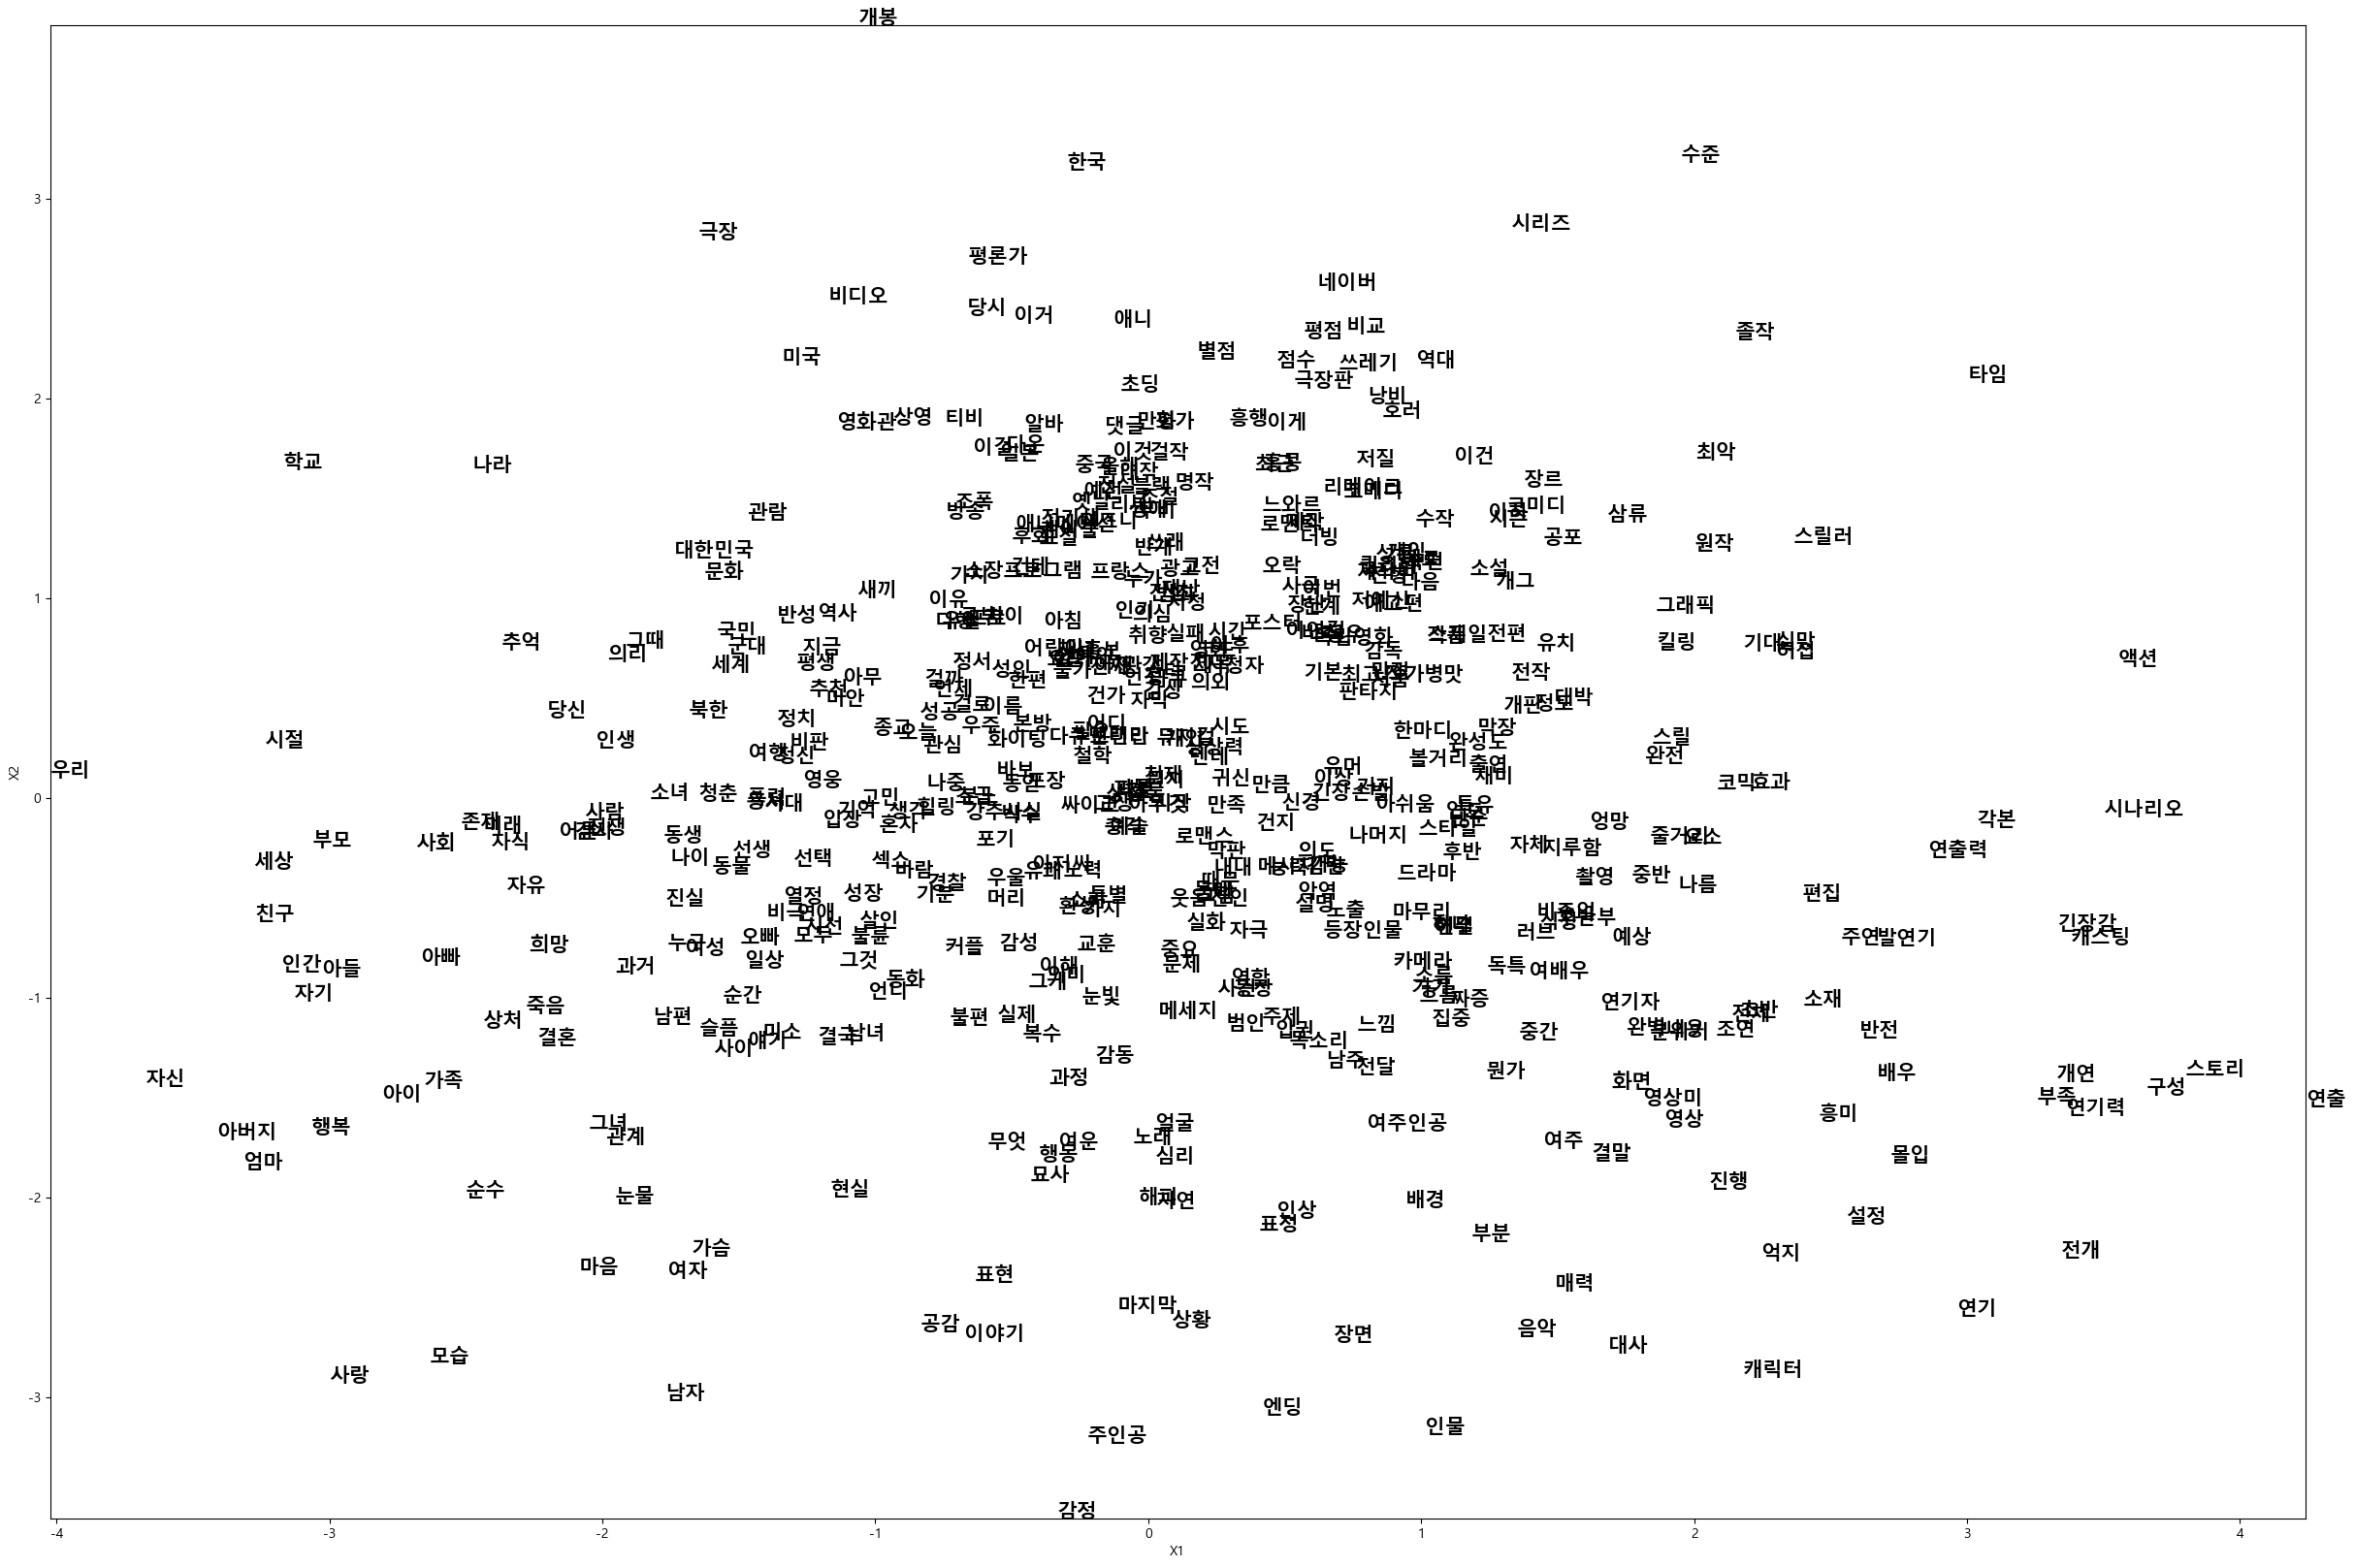

In [10]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
plt.figure(figsize=(30, 20))
plt.xlim(x_pca[:, 0].min(), x_pca[:, 0].max())
plt.ylim(x_pca[:, 1].min(), x_pca[:, 1].max())
for i in range(len(vectors)):
    plt.text(x_pca[i, 0], x_pca[i, 1], str(vocab_str[i]),
             fontdict={'weight': 'bold', 'size': 15})
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()